## Using the ARIMA Model

ARIMA stands for AutoRegressive Integrated Moving Average.
It is a time series forecasting model that uses autocorrelation to model structures within the time series data to predict future values.
Autoregression measures the dependency of a particular sample with a few past observations.

ARIMA model consists of three parameters: p, d and q.   
* p is the number of lagged (or past) observations to consider for autoregression.
* d is the number of times the raw observations are differenced to make the time series stationary.
* q is the size of the moving average window.

The predicted values depend on a weighted linear combination of its past values.

#describe the model a bit more.




Applications of the ARIMA model: for predicting future values and identify fluctuations in data over a period of time. e.g., for seven-day weather forecasting.


Determining if the ARIMA model is the right model to use:
If the past values in your data affect the current or future values and if they could be used to foretell future trends based on recent fluctuations, then time-series forecasting is the solution for such a regression problem.

Some models (such as the one we demonstrated previously using Skforecaster) use purely statistical quantities that often incorporate trends from historical data which may not be relevant in the present or future values. These assumptions, though valid, often fail in real life. 

ARIMA's autoregressive and moving-average approach is used to model stationary time-series data. It evaluates the importance of past fluctuations, includes overall trends and smoothens the effect of outliers and temporary abnormal changes in the data.

In this project, we will use the statsmodel library of Python to implement the ARIMA model. The TSA sub-module of statsmodel provides an implementation of the ARIMA model as statsmodel.tsa.arima_model.ARIMA


In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ADF test
from statsmodels.tsa.stattools import adfuller
#ARIMA model
from statsmodels.tsa.arima.model import ARIMA
#Auto ARIMA
import pmdarima as pm
#Plot predicted values
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
# fixing the size of figures
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':80})

# Loading the data from CSV

In [4]:
covid_df_CE_Inpatient = pd.read_csv('covid_df_CE_Inpatient.csv', parse_dates=['x'])
covid_df_CE_Inpatient.info()

covid_df_SK_Inpatient = pd.read_csv('covid_df_SK_Inpatient.csv')
covid_df_REG_Inpatient = pd.read_csv('covid_df_REG_Inpatient.csv')
covid_df_NC_Inpatient = pd.read_csv('covid_df_NC_Inpatient.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   x       552 non-null    datetime64[ns]
 1   y       552 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.8 KB


In [5]:
covid_df_CE_Inpatient.head()

covid_df_SK_Inpatient.head()
covid_df_REG_Inpatient.head()
covid_df_NC_Inpatient.head()

,x,y
0,2020-08-04,55.0
1,2020-08-05,57.0
2,2020-08-06,58.0
3,2020-08-07,58.0
4,2020-08-08,61.0


In [6]:
covid_df_CE_Inpatient.tail()

covid_df_SK_Inpatient.tail()
covid_df_REG_Inpatient.tail()
covid_df_NC_Inpatient.tail()

,x,y
547,2022-02-02,9847.0
548,2022-02-03,9868.0
549,2022-02-04,10024.0
550,2022-02-05,10094.0
551,2022-02-06,10169.0


[Text(0.5, 1.0, 'ICU Inpatient - North Central')]

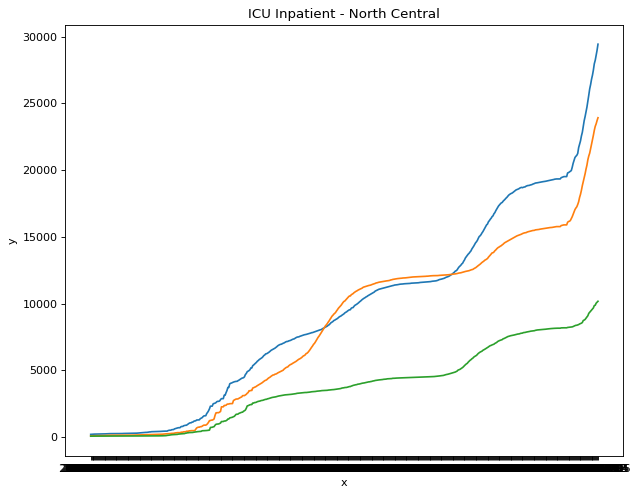

In [7]:
#Visualizing the data

#sns.lineplot(x="x", y="y",legend = 'full' , data=covid_df_CE_Inpatient).set(title='ICU Inpatient - Central East')

sns.lineplot(x="x", y="y",legend = 'full' , data=covid_df_SK_Inpatient).set(title='ICU Inpatient - Saskatoon')
sns.lineplot(x="x", y="y",legend = 'full' , data=covid_df_REG_Inpatient).set(title='ICU Inpatient - Regina')
sns.lineplot(x="x", y="y",legend = 'full' , data=covid_df_NC_Inpatient).set(title='ICU Inpatient - North Central')

# Choosing the parameters p,d and q

## 1. Choosing d

### Plotting the autocorrelation function

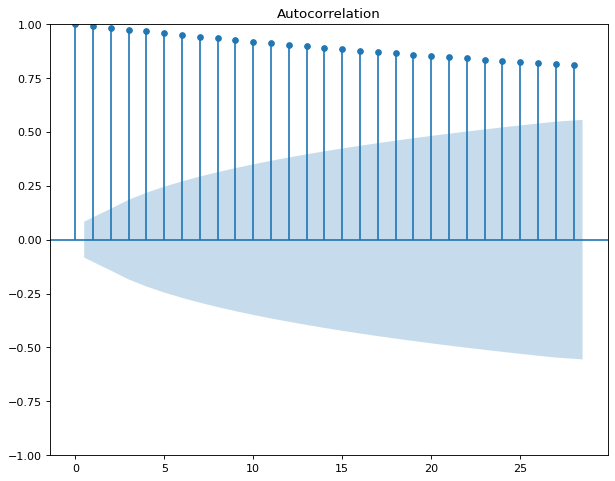

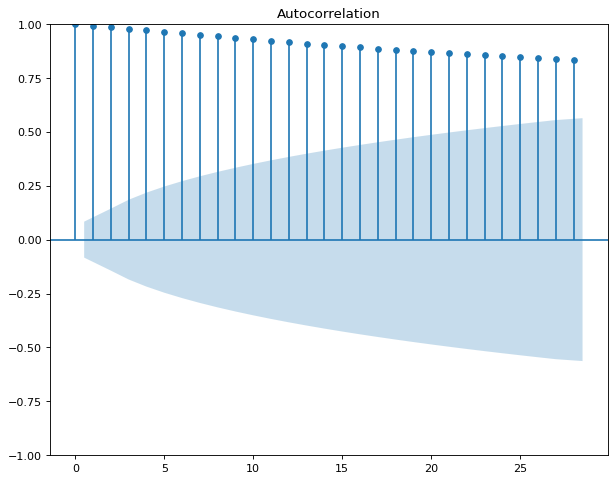

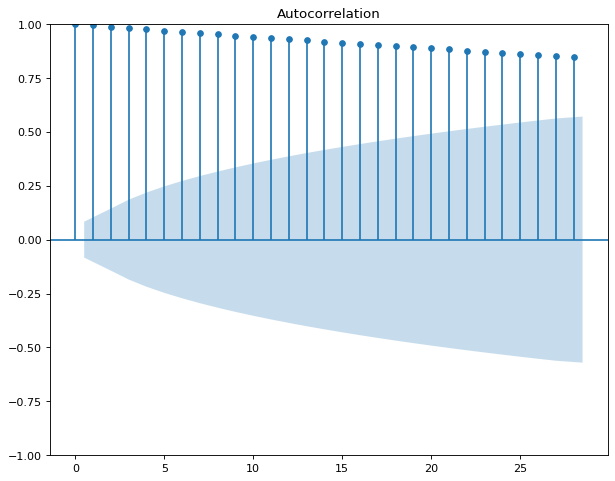

In [8]:
#Checking the order of differencing by checking the autocorrelation plot using the statsmodel package.

plot_acf(covid_df_SK_Inpatient['y'])
plt.show()
plot_acf(covid_df_REG_Inpatient['y'])
plt.show()
plot_acf(covid_df_NC_Inpatient['y'])
plt.show()

In [9]:
#data = covid_df_SK_Inpatient

data1 = covid_df_SK_Inpatient
data2 = covid_df_REG_Inpatient
data3 = covid_df_NC_Inpatient

In [10]:
data1.head()

,x,y
0,2020-08-04,190.0
1,2020-08-05,196.0
2,2020-08-06,199.0
3,2020-08-07,206.0
4,2020-08-08,209.0


### Using the differencing segment to make the data stationary

#### i) Differencing and displaying the results graphically

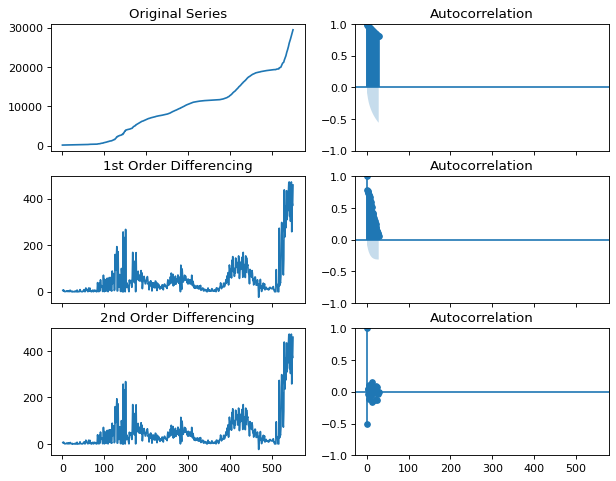

In [11]:
#Saskatoon

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data1.y); axes[0, 0].set_title('Original Series')
plot_acf(data1.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data1.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data1.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data1.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data1.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

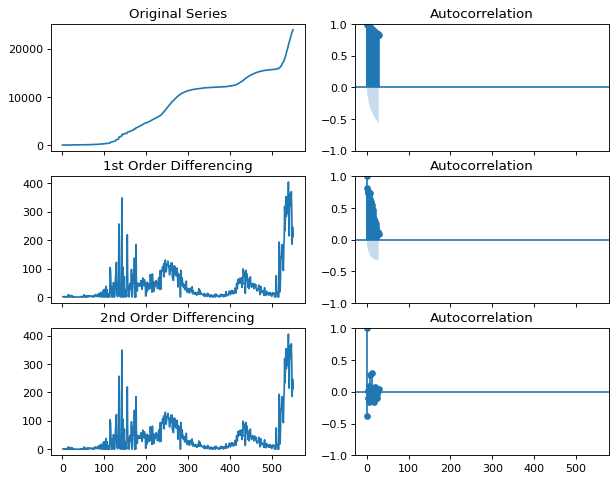

In [12]:
#Regina

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data2.y); axes[0, 0].set_title('Original Series')
plot_acf(data2.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data2.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data2.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data2.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data2.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

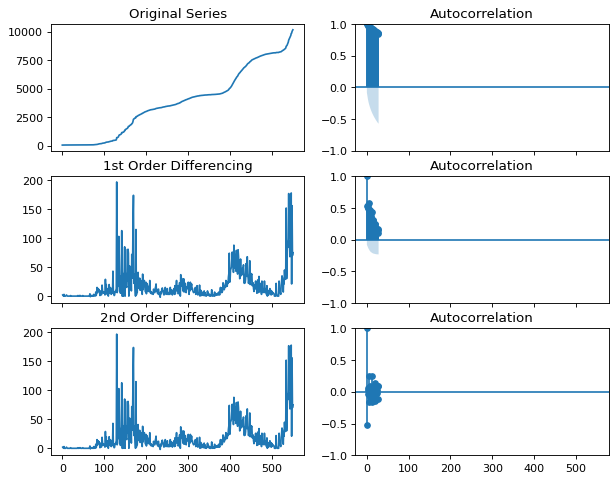

In [13]:
#North Central

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data3.y); axes[0, 0].set_title('Original Series')
plot_acf(data3.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data3.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data3.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data3.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data3.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

#### ii) Checking if the series is stationary using the Augmented Dickey Fuller (ADF) test (adfuller()), from the statsmodels package.

We need differencing only if the series is non-stationary; otherwise, no differencing is needed, that is, d=0.
The ADF test calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [14]:
# Original Series
result = adfuller(data1.y.dropna())
print("---Original---")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# 1st Order Differencing
result1 = adfuller(data1.y.diff().dropna())
print("---1st Order Differencing---")
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
  print('\t%s: %.3f' % (key, value))

# 2nd Order Differencing
result2 = adfuller(data1.y.diff().diff().dropna())
print("---2nd Order Differencing---")
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
  print('\t%s: %.3f' % (key, value))

# 3rd Order Differencing
result3 = adfuller(data1.y.diff().diff().diff().dropna())
print("---3rd Order Differencing---")
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Critical Values:')
for key, value in result3[4].items():
  print('\t%s: %.3f' % (key, value))


---Original---
ADF Statistic: 1.530852
p-value: 0.997635
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---1st Order Differencing---
ADF Statistic: 0.231291
p-value: 0.973963
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---2nd Order Differencing---
ADF Statistic: -5.415038
p-value: 0.000003
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570
---3rd Order Differencing---
ADF Statistic: -9.509980
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


##### Observation:   
After 2nd order differencing, the p-value is extremely small. Thus this series is very likely to be stationary. We will consider “d” as 2 and see how the model performs.

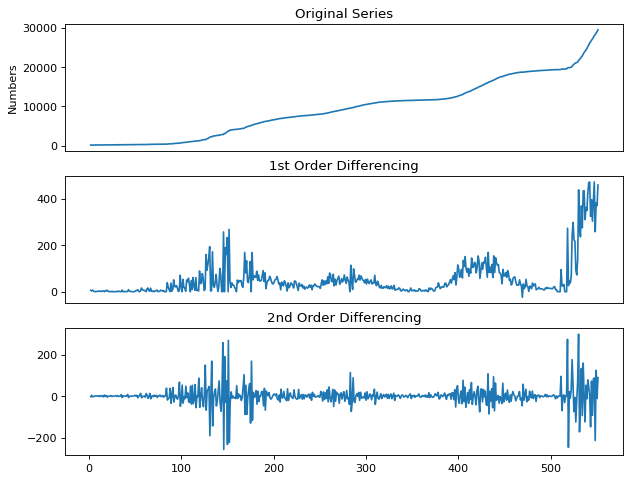

In [15]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(data1.y); ax1.set_title('Original Series'); ax1.set_xlabel('Time'); ax1.set_ylabel('Numbers'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(data1.y.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(data1.y.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

## 2. Choosing p

P is the order for the autoregressive model. 
We can obtain the value of p by inspecting the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. 
Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

We will determine p based on the most significant lag in the _partial autocorrelation plot_. We will will evaluate upto the 2nd order difference and inspect.

C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


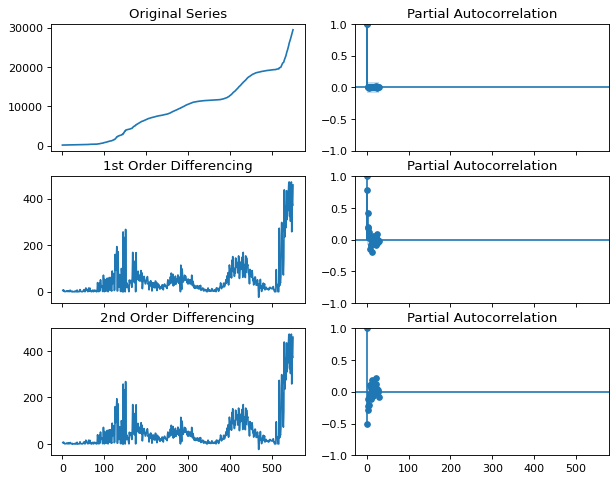

In [16]:
# Original Series
fig1, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data1.y); axes[0, 0].set_title('Original Series')
plot_pacf(data1.y, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(data1.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(data1.y.diff().dropna(), ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(data1.y.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(data1.y.diff().diff().dropna(), ax=axes[2, 1])
plt.show()

Observation:

The value of p is selected based on how many lags cross the significance limit (blue region) in the PACF plot. 
PACF lag 1 is quite significant since it is well above the significance line. Lag 2 and 3 are significant as well.
We wil pick p=1 tentatively.

## 3. Choosing $q$

The order of the MA term (q) is obtained by looking at the error of the lagged forecast in the ACF plot.
The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

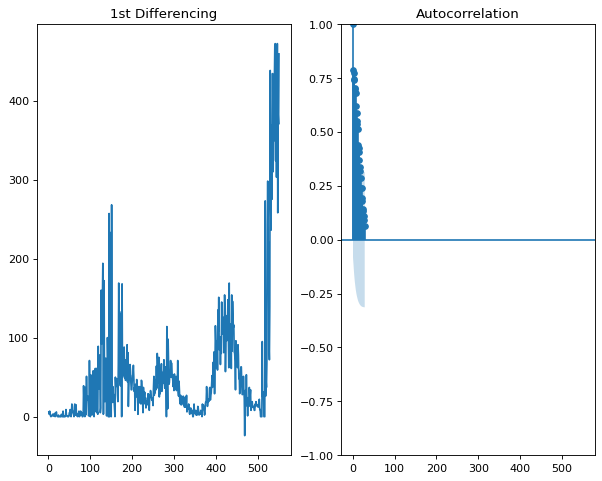

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True)

# 1st Order Differencing
axes[0].plot(data1.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
#axes[1].set(xlim=('2019-08-02','2023-02-06'))
plot_acf(data1.y.diff().dropna(), ax=axes[1])

plt.show()

Observation:
    
Several lags are above the significance line. We will tentatively fix q as 2.

# Building the ARIMA Model

Using the statsmodel package and determined values of p, d and q.

In [18]:
import warnings

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

In [19]:
#order=(p =1, d=2, q=2)

#Saskatoon
# 1,1,2 ARIMA Model
model1 = ARIMA(data1.y, order=(1,2,2))
model_fit1 = model1.fit()
print(model_fit1.summary())

#Regina
# 1,1,2 ARIMA Model
model2 = ARIMA(data2.y, order=(1,2,2))
model_fit2 = model2.fit()
print(model_fit2.summary())

#North Cental
# 1,1,2 ARIMA Model
model3 = ARIMA(data3.y, order=(1,2,2))
model_fit3 = model3.fit()
print(model_fit3.summary())


C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jngai\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  552
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2800.168
Date:                Wed, 07 Dec 2022   AIC                           5608.337
Time:                        13:38:18   BIC                           5625.577
Sample:                             0   HQIC                          5615.074
                                - 552                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7101      0.078      9.145      0.000       0.558       0.862
ma.L1         -1.5010      0.070    -21.496      0.000      -1.638      -1.364
ma.L2          0.6088      0.047     12.973      0.0

## Prediction Using the Trained Model

In [20]:
#Saskatoon
#Predicting using the trained model
data1 = covid_df_SK_Inpatient["y"]

data1.index = pd.date_range(start='2020-08-04', end='2022-02-06', freq='D')
data1.head()

#Regina
#Predicting using the trained model
data2 = covid_df_REG_Inpatient["y"]

data2.index = pd.date_range(start='2020-08-04', end='2022-02-06', freq='D')
data2.head()

#North Central
#Predicting using the trained model
data3 = covid_df_NC_Inpatient["y"]

data3.index = pd.date_range(start='2020-08-04', end='2022-02-06', freq='D')
data3.head()

2020-08-04    55.0
2020-08-05    57.0
2020-08-06    58.0
2020-08-07    58.0
2020-08-08    61.0
Freq: D, Name: y, dtype: float64

## Splitting data into training and test datasets

In [21]:
#Train dates : 2020-08-04 00:00:00 --- 2021-10-19 00:00:00  (n=442)
#Test dates  : 2021-10-20 00:00:00 --- 2022-02-06 00:00:00  (n=110)

In [22]:
#Splitting the data into train-test samples.
#Using the 80-20 split for training and test data respectively.
#Training andfitting the model

#Saskatoon
arima_model1 = ARIMA(data1[:442], order=(1,2,2))
model1 = arima_model1.fit()
print(model1.summary())

#Regina
arima_model2 = ARIMA(data2[:442], order=(1,2,2))
model2 = arima_model2.fit()
print(model2.summary())

#North Centra
arima_model3 = ARIMA(data3[:442], order=(1,2,2))
model3 = arima_model3.fit()
print(model3.summary())

#arima_model1 = ARIMA(data1[:442], order=(1,2,2)).fit()
#print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  442
Model:                 ARIMA(1, 2, 2)   Log Likelihood               -2133.222
Date:                Wed, 07 Dec 2022   AIC                           4274.444
Time:                        13:38:19   BIC                           4290.791
Sample:                    08-04-2020   HQIC                          4280.893
                         - 10-19-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8264      0.063    -13.147      0.000      -0.950      -0.703
ma.L1         -0.0692      0.079     -0.878      0.380      -0.224       0.085
ma.L2         -0.5660      0.067     -8.439      0.0

### Plotting graph - Prediction of COVID-19 Hospitalizations Using ARIMA

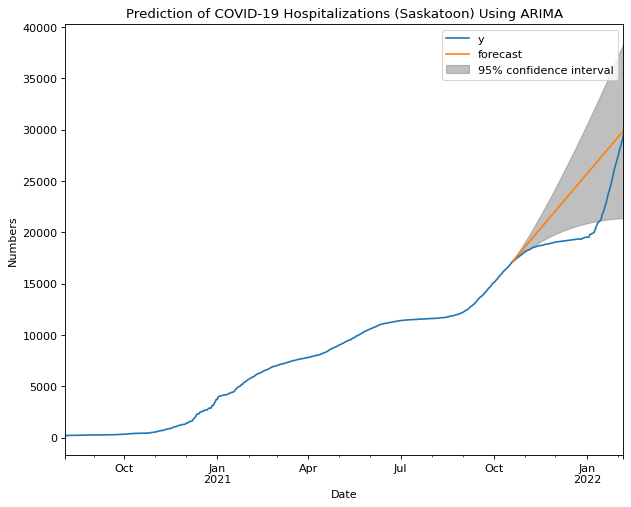

In [23]:
#Saskatoon
#res = ARIMA(data1[:442], order=(1,2,2)).fit()
fig, ax = plt.subplots()
ax = data1.loc['2020-08-04':].plot(ax=ax)
ax.set_title("Prediction of COVID-19 Hospitalizations (Saskatoon) Using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Numbers")
plot_predict(model1, '2021-10-20', '2022-02-06', ax=ax)
ax.legend()
plt.show()

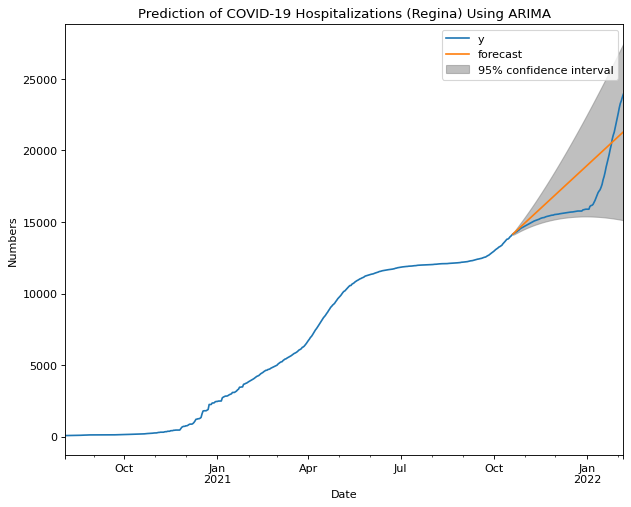

In [24]:
#Regina
#res = ARIMA(data1[:442], order=(1,2,2)).fit()
fig, ax = plt.subplots()
ax = data2.loc['2020-08-04':].plot(ax=ax)
ax.set_title("Prediction of COVID-19 Hospitalizations (Regina) Using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Numbers")
plot_predict(model2, '2021-10-20', '2022-02-06', ax=ax)
ax.legend()
plt.show()

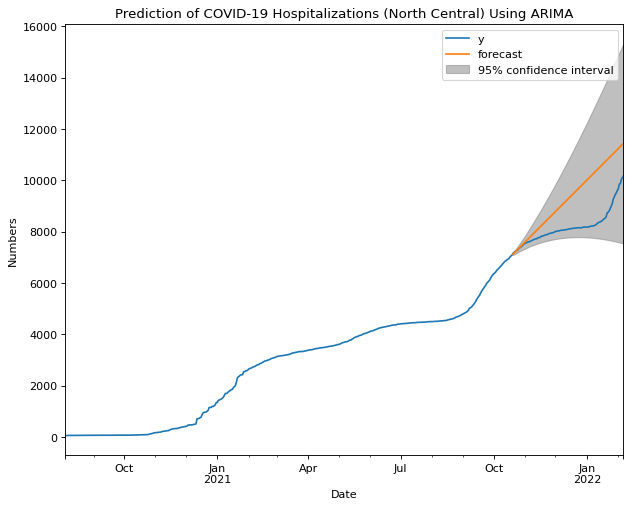

In [25]:
#North Central
#res = ARIMA(data1[:442], order=(1,2,2)).fit()
fig, ax = plt.subplots()
ax = data3.loc['2020-08-04':].plot(ax=ax)
ax.set_title("Prediction of COVID-19 Hospitalizations (North Central) Using ARIMA")
ax.set_xlabel("Date")
ax.set_ylabel("Numbers")
plot_predict(model3, '2021-10-20', '2022-02-06', ax=ax)
ax.legend()
plt.show()

URL: https://stackoverflow.com/questions/73112516/arimaresults-object-has-no-attribute-plot-predict-error

# Evaluating the Model's Performance

In [ ]:
#Saskatoon
#print array
y_pred1 = pd.Series(model1.forecast(110)[0], index=data1.y[442:].index)
y_true1 = data1.y[442:]

print(np.array(y_pred))
print(np.array(y_true))

#Regina
#print array
y_pred2 = pd.Series(model2.forecast(110)[0], index=data2.y[442:].index)
y_true2 = data2.y[442:]

#North Central
#print array
y_pred3 = pd.Series(model3.forecast(110)[0], index=data3.y[442:].index)
y_true3 = data3.y[442:]

In [ ]:
len(y_pred), len(y_true)

## Plotting Residual Errors

In [ ]:
#Saskatoon
# Plot residual errors
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#Regina
# Plot residual errors
residuals = pd.DataFrame(model2.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

#North Central
# Plot residual errors
residuals = pd.DataFrame(model3.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Observation:
    
The residual errors have zero mean and uniform variance, which is good.

## Measuring the Performance : RMSE, MAE, MPE and MAPE

* root mean squared (RMSE)   
* mean absolute error (MAE)   
* mean percentage error (MPE)   
* mean absolute percentage error (MAPE)   
* correlation coefficient (to measure similarity)   
* min-max error.

In [ ]:
mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
mae = np.mean(np.abs(y_pred - y_true))
mpe = np.mean((y_pred - y_true)/y_true)
rmse = np.mean((y_pred - y_true)**2)**.5
corr = np.corrcoef(y_pred, y_true)[0,1]

print("mape: ",mape)
print("mae: ", mae)
print("mpe: ", mpe)
print("rmse: ", rmse)
print("corr: ", corr)

**Conclusion:**
    
    1. There is a high correlation between predicted values of y and actual values of y, with y in this case being the numbeer of ICU hospitalizations.
